**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check files**

In [3]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_nuc", txt_folder, "summary")
txt_fname  = "region.annotation.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_nuc/fcc_astarr_macs_input_overlap/summary/region.annotation.gc_content.tsv 


## Import data

In [4]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_nuc", txt_folder, "summary")
    txt_fname = "region.annotation.gc_content.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150042      6

$fcc_astarr_macs_input_union
[1] 246852      6



Chrom,ChromStart,ChromEnd,Region,pGC,Length
chr1,10038,10405,chr1:10038-10405,0.523161,367
chr1,14282,14614,chr1:14282-14614,0.578313,332
chr1,16025,16338,chr1:16025-16338,0.587859,313


## Arrange table

**Helper function to map label**

In [5]:
fun_str_map_label = function(vec_txt_input){
    vec_txt_pattern = c("overlap", "union")
    vec_txt_replace = c("ATAC (Overlap)", "ATAC (Union)")
    vec_txt_output  = fun_str_map_detect(
        vec_txt_input,
        vec_txt_pattern,
        vec_txt_replace
    )
    return(vec_txt_output)
}

### test function
fun_str_map_label("ASTARR_overlap")

[1] "ATAC (Overlap)"

**Combine tables**

In [6]:
### Concatenate tables
lst = lst_dat_region_annot_import
dat = bind_rows(lst, .id = "Label")

### Update labels
dat = dat %>% dplyr::mutate(Label = fun_str_map_label(Label))

### assign and show
dat_region_annot_arrange = dat
print(dim(dat))
print(table(dat$Label))
fun_display_table(head(dat, 3))

[1] 396894      7

ATAC (Overlap)   ATAC (Union) 
        150042         246852 


Label,Chrom,ChromStart,ChromEnd,Region,pGC,Length
ATAC (Overlap),chr1,10038,10405,chr1:10038-10405,0.523161,367
ATAC (Overlap),chr1,14282,14614,chr1:14282-14614,0.578313,332
ATAC (Overlap),chr1,16025,16338,chr1:16025-16338,0.587859,313


## Explore data

### Distribution of region length (double check)

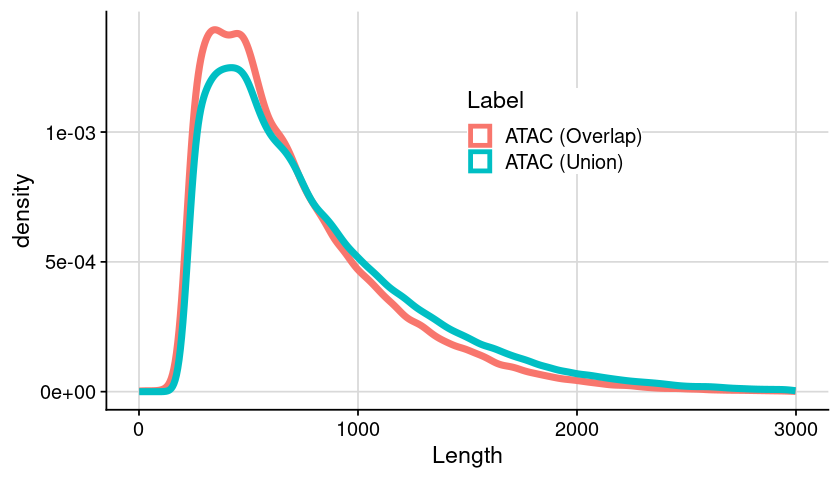

In [7]:
### arrange table
dat = dat_region_annot_arrange
dat = dat %>% 
    dplyr::mutate(Length = ChromEnd - ChromStart) %>%
    dplyr::filter(Length < 3000)

### generate plot
gpt = ggplot(dat, aes(x = Length, color = Label)) + 
    geom_density(linewidth=2) +
    theme_cowplot() + 
    background_grid() +
    theme(
        legend.position = "inside", 
        legend.position.inside = c(0.5, 0.7),
        legend.background = element_rect(fill = "white")
    )

### show plot
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

### Distribution of GC content

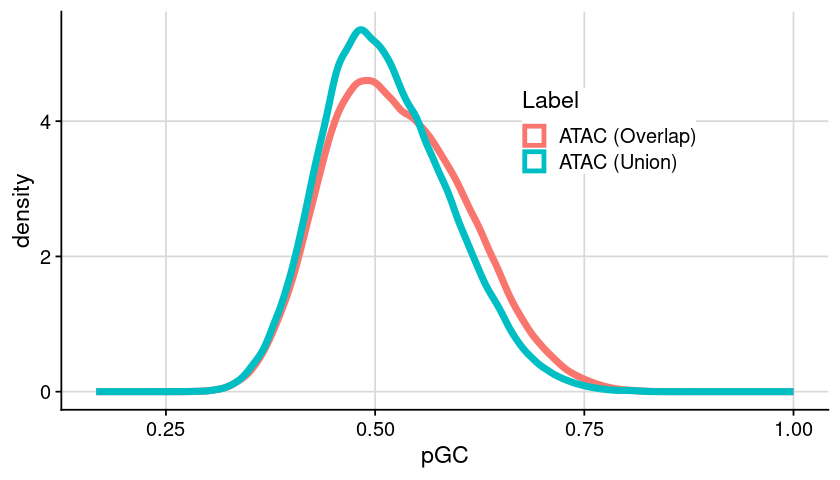

In [8]:
### init
dat = dat_region_annot_arrange

### generate plot
gpt = ggplot(dat, aes(x = pGC, color = Label)) + 
    geom_density(linewidth=2) +
    theme_cowplot() + 
    background_grid() +
    theme(
        legend.position = "inside", 
        legend.position.inside = c(0.6, 0.7),
        legend.background = element_rect(fill = "white")
    )

### show plot
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

## Export results

**Summarize information**

In [9]:
fun_mode_continuous = function(x, ...) {
    obj = density(x, ...)
    num = obj$x[which.max(obj$y)]
    return(num)
}

In [10]:
### compute counts and info
dat = dat_region_annot_arrange
dat = dat %>%
    group_by(Label) %>%
    summarise(
        Mean = mean(pGC), 
        Mode = fun_mode_continuous(pGC),
        .groups="drop")
dat_region_annot = dat

### build a named vector of new legend labels, each with two lines:
###   original label
###   Count = 12345
dat = dat_region_annot
vec = dat %>%
    dplyr::mutate(
        line1 = Label,
        line2 = paste("Mean =", round(Mean, 2), " "),
        line3 = paste("Mode =", round(Mode, 2), " "),
        combined = paste0(line1, "\n", line2, "\n", line3)
    ) %>%
    { set_names(.$combined, .$Label) }
vec_txt_region_label = vec

print(vec_txt_region_label)

                                ATAC (Overlap) 
"ATAC (Overlap)\nMean = 0.53  \nMode = 0.49  " 
                                  ATAC (Union) 
  "ATAC (Union)\nMean = 0.51  \nMode = 0.48  " 


**Create plot**

In [11]:
### set text size
theme_text <- theme(
    title        = element_text(size = 16),
    axis.title   = element_text(size = 16),
    axis.text    = element_text(size = 14),
    legend.title = element_text(size = 14),
    legend.text  = element_text(size = 12)
)

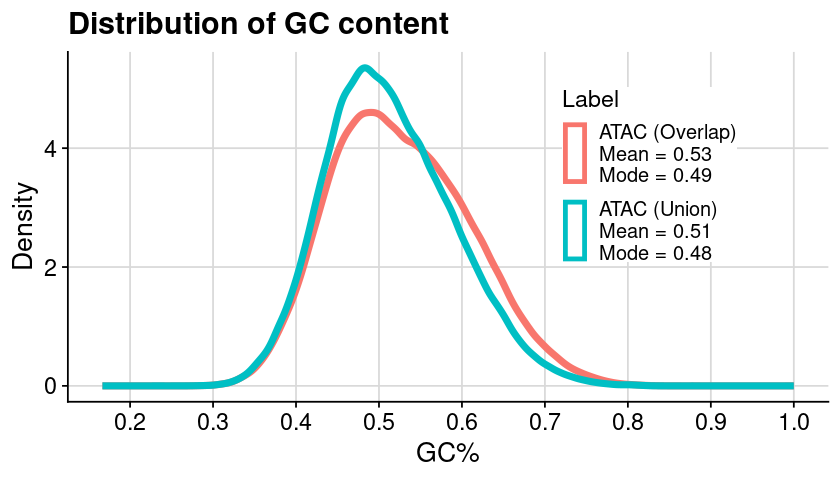

In [12]:
### init
dat = dat_region_annot_arrange

### generate plot
gpt = ggplot(dat, aes(x = pGC, color = Label)) + 
    geom_density(linewidth=2) +
    theme_cowplot() + 
    background_grid() +
    labs(x = "GC%", y = "Density", title = "Distribution of GC content") +
    scale_x_continuous(breaks = seq(0, 1, by = 0.1)) +
    scale_y_continuous(breaks = seq(0, 5, by = 2)) +
    scale_color_discrete(labels = vec_txt_region_label) +
    theme_text +
    theme(
        legend.position = "inside", 
        legend.position.inside = c(0.65, 0.65),
        legend.background = element_rect(fill = "white"),
        legend.key.spacing.y = unit(0.3, 'cm')
    )

### assign plot
gpt_export = gpt

### show plot
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

**Save plot**

In [13]:
txt_fdiry = "./"
txt_fname = "fig.region.fcc_astarr_macs_input.distribution.gc_content.png"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, gpt_export, height = 4, width = 7, units = "in")

txt_fdiry = "./"
txt_fname = "fig.region.fcc_astarr_macs_input.distribution.gc_content.svg"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, gpt_export, height = 4, width = 7, units = "in")